# 2. 탐색적 분석

## 가. 개요
- summary(data), head(data)를 보여 준뒤, 데이터 분석 방법과 인사이트를 제시하라는 문제가 출제
- 제시된 데이터에 대해 이해하고 있는 바를 서술
- 적절한 분석 방법론을 나열
- 최적의 방법론 선택 및 분석실행과정을 상세하게 기술
- 예상되는 분석 결과를 제시
- 결과를 통한 인사이트 제시
- 분석 과정 중 예상되는 주의사항 등을 추가 하면 더 좋음

## 나. 예상문제
- iris 데이터 셋

### 1) 문제 : 붓꽃의 종류를 분류하기 위한 방법을 제시하시오

In [34]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [35]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

### 2) 문제분석

- 독립변수 : Sepal.Length, Sepal.Width, Petal.Length, Petal.Width
- 종속변수 : Species ( setosa, versicolor, virginica )
    - 종속 변수 존재 : 정형 데이터 마이닝
    - 종속 변수가 명목형 데이터 => 분류분석
- 분류분석 방법론
    - 로지스틱 회귀분석
    - 의사결정나무
    - 앙상블 기법
        - 배깅
        - 부스팅
        - 랜덤포레스트
    - 인공신경망
    - 나이브 베이지안
    - K-NN
    - SVM
    

#### 1. 의사결정나무
- 의사결정나무 사용
    - 사용 패키지 : rpart
    - rpart 인자
        - formula  : 함수식
        - data     : 데이터
        - weights  : 가중치
        - subset   : 그룹변수
        - na.action: 결측값 처리
        - method   : 분석방법 ( 'anova', 'poisson', 'class', 'exp', 'dist', 'mrt', 'user) 
        - model    : 모델
        - x        : 독립변수
        - y        : 종속변수
        - parms    : 매개변수 
        - control  : 통제조건
        - cost     : 비음조건

In [36]:
# levels => factor 자료형에 사용
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [37]:
install.packages('rpart.plot')
library(rpart) # rpart 패키지 불러오기
library(rpart.plot)

Installing package into 'C:/Users/bcduc/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'rpart.plot' is in use and will not be installed"

In [38]:
train = sample(1:150, 100) # 무작위로 100개 추출
tree = rpart(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data = iris, subset = train, method = 'class')

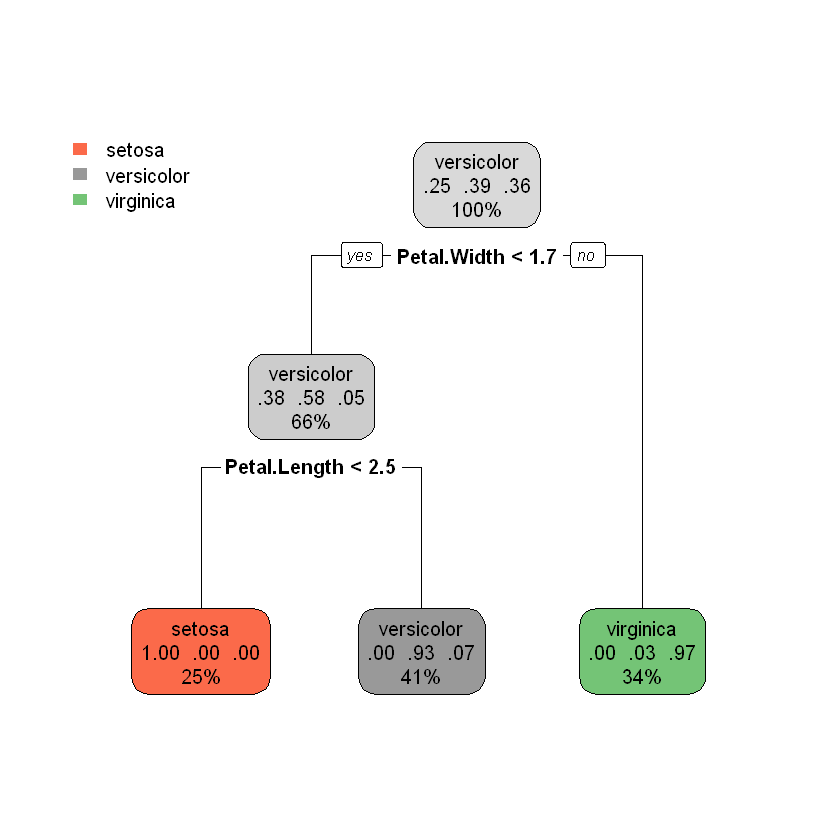

In [39]:
# 그래프 그리기
rpart.plot(tree)

In [40]:
summary(tree)

Call:
rpart(formula = Species ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, data = iris, subset = train, method = "class")
  n= 100 

         CP nsplit  rel error    xerror       xstd
1 0.5245902      0 1.00000000 1.0655738 0.07819174
2 0.4098361      1 0.47540984 0.4754098 0.07438722
3 0.0100000      2 0.06557377 0.1311475 0.04447429

Variable importance
 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
          37           32           19           12 

Node number 1: 100 observations,    complexity param=0.5245902
  predicted class=versicolor  expected loss=0.61  P(node) =1
    class counts:    25    39    36
   probabilities: 0.250 0.390 0.360 
  left son=2 (66 obs) right son=3 (34 obs)
  Primary splits:
      Petal.Width  < 1.65 to the left,  improve=29.12367, (0 missing)
      Petal.Length < 2.45 to the left,  improve=28.14000, (0 missing)
      Sepal.Length < 5.45 to the left,  improve=20.13200, (0 missing)
      Sepal.Width  < 3.35 to the right, improve=

In [41]:
# 가치지치(Prunning) 수행하기
printcp(tree)


Classification tree:
rpart(formula = Species ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, data = iris, subset = train, method = "class")

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 61/100 = 0.61

n= 100 

       CP nsplit rel error  xerror     xstd
1 0.52459      0  1.000000 1.06557 0.078192
2 0.40984      1  0.475410 0.47541 0.074387
3 0.01000      2  0.065574 0.13115 0.044474


In [42]:
# rpart 패키지의 prune() 함수
# tree : rpart tree 모델
# cp   : 기준이 되는 복잡도(Complexity parameter)
# 가지치기 (prunning)
pruned_tree = prune(tree, cp = 0.1) # cp = 0.1로 가지치기

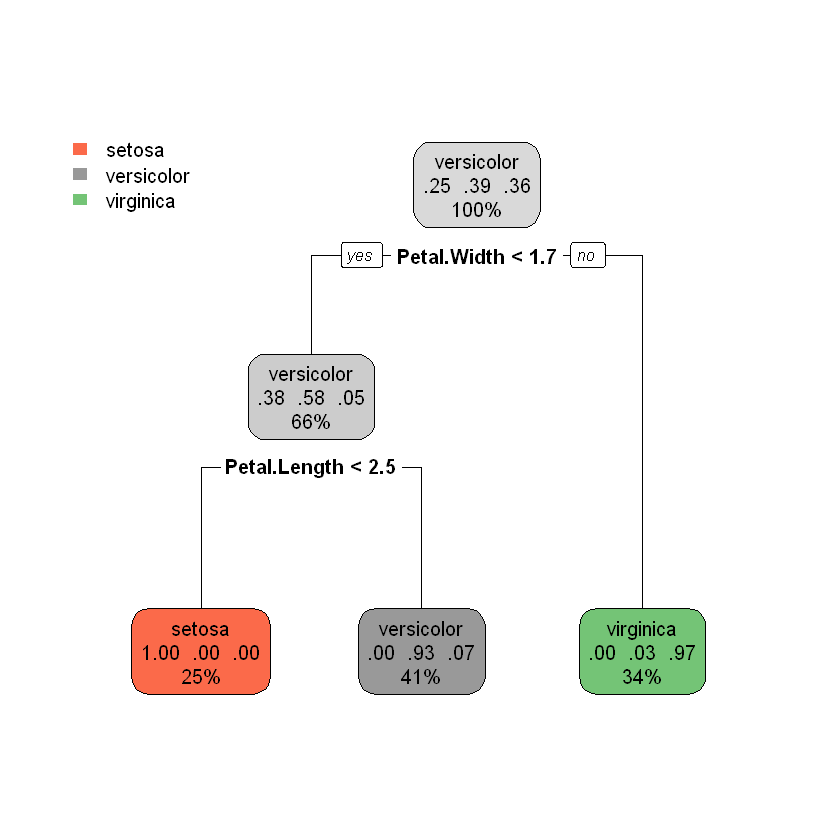

In [43]:
rpart.plot(pruned_tree)

In [44]:
# 학습된 의사결정나무모델로 Test데이터 예측
predict(pruned_tree, iris[-train,], type = 'class')

3          5          6          8         12         13         14 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        15         18         21         23         24         25         32 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        33         34         35         36         37         39         42 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        43         44         46         49         51         61         65 
    setosa     setosa     setosa     setosa versicolor versicolor versicolor 
        74         78         80         81         85         89         94 
versicolor  virginica versicolor versicolor versicolor versicolor versicolor 
        95        101        105        109        110        112        116 
versicolor  virginica  virginica  virginica  virginica  virginica  virginica 
       120        121        126        129        131        136        145 
versicolor  virginica  virginica  virginica  virginica  virginica  virginica 
       148 
 virginica 
Levels: setosa versicolor virginica

In [45]:
# 정오분류표(confusion matrix) 작성
(tt = table(iris$Species[-train], predict(pruned_tree, iris[-train,], type = 'class')))

            
             setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         10         1
  virginica       0          1        13

In [50]:
# 정분류율 및 오분류율 계산
sum(tt[row(tt) == col(tt)]) / sum(tt) # 정분류율

[1] 0.96

In [51]:
1 - sum(tt[row(tt) == col(tt)]) / sum(tt) # 오분류율

[1] 0.04

In [54]:
# 정오분류표 그래프화
test = iris[-train,] # 테스트 데이터
test$pred = predict(pruned_tree, test, type = 'class')

In [55]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

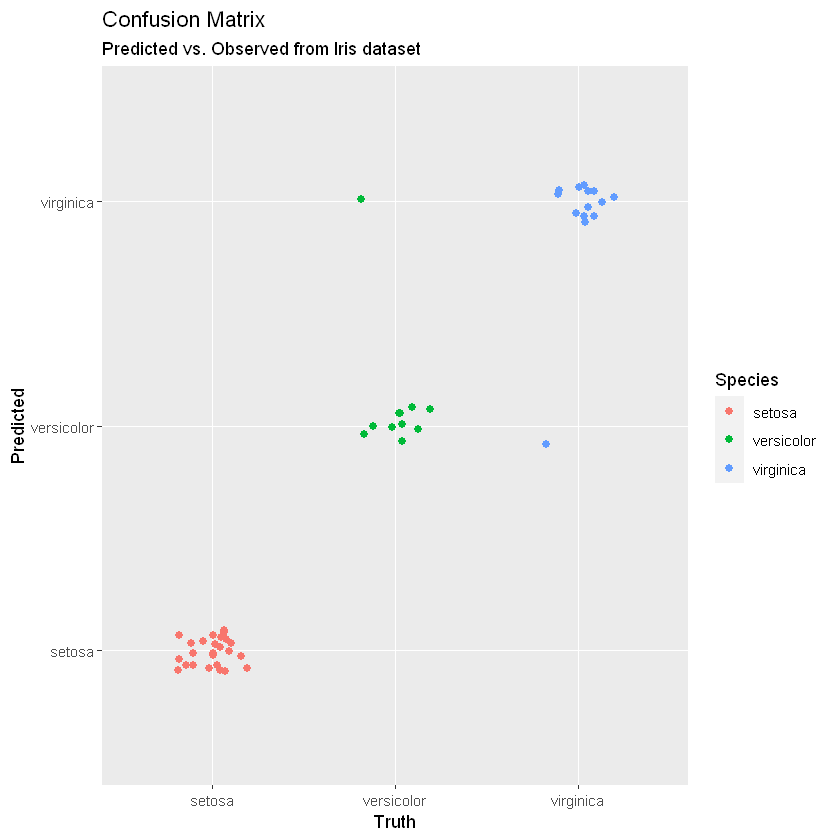

In [61]:
ggplot(test, aes(Species, pred, color = Species)) + geom_jitter(width = 0.2, height = 0.1, size=2) + labs(title = 'Confusion Matrix', subtitle = 'Predicted vs. Observed from Iris dataset', y = 'Predicted', x='Truth')

#### 요약
- 의사결정나무는 데이터를 나무구조로 도표화하여 분석하는 방법으로 분류와 회귀분석에도 사용할 수 있음.
- 부모노드에서 자식노드로 분기 될때 순수도가 증가되도록 구성되어야함
- 순수도를 나타내는 지표들은 여러가지가 있음
- R에서 의사결정나무를 학습시키는 함수는 rpart패키지의 rpart()함수
- 가지치기(pruning) MIN + 1SE 기준으로 수행될 수 있음

#### 2. 로지스틱 회귀분석
- vglm() 인자
    - formula    : 함수식
    - family     : vglmff의 함수
    - data       : 데이터
    - weights    : 가중치
    - subset     : 그룹데이터
    - na.action  : 결측치 처리
    - etastart, mustart, coefstart  : 예측 초기치
    - offset     : eta 포함 선형예측 성분지정
    - method     : 적용하는 추정방법

In [63]:
# iris 데이터 살펴보기
colnames(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [64]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [65]:
# VGAM 패키지의 vglm() 함수 이용해서 다항 로지스틱 모델 학습

In [67]:
# 다항 로지스틱 모델 학습시키기
install.packages('VGAM')
library(VGAM)

Installing package into 'C:/Users/bcduc/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'VGAM' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bcduc\AppData\Local\Temp\Rtmpw7BEIw\downloaded_packages


Warning message:
"package 'VGAM' was built under R version 3.6.3"Loading required package: stats4
Loading required package: splines


In [68]:
train = sample(1:150, 100) # 무작위로 100개 추출 (학습데이터)

In [69]:
fit.Logistic = vglm(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, family = multinomial, iris)

Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
"2 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12"Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
"13 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12"Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
"22 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12"Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
"34 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12"Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
"39 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12"Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
"41 diagonal elements of the working

In [70]:
summary(fit.Logistic) # 학습된 결과 살펴보기

Warning message in temp1@family@linkinv(eta = temp1@predictors, extra = temp1@extra):
"fitted probabilities numerically 0 or 1 occurred"Warning message in temp1@family@linkinv(eta = temp1@predictors, extra = temp1@extra):
"fitted probabilities numerically 0 or 1 occurred"Warning message in temp1@family@linkinv(eta = temp1@predictors, extra = temp1@extra):
"fitted probabilities numerically 0 or 1 occurred"Warning message in temp1@family@linkinv(eta = temp1@predictors, extra = temp1@extra):
"fitted probabilities numerically 0 or 1 occurred"Warning message in temp1@family@linkinv(eta = temp1@predictors, extra = temp1@extra):
"fitted probabilities numerically 0 or 1 occurred"Warning message in temp1@family@linkinv(eta = temp1@predictors, extra = temp1@extra):
"fitted probabilities numerically 0 or 1 occurred"Warning message in temp1@family@linkinv(eta = temp1@predictors, extra = temp1@extra):
"fitted probabilities numerically 0 or 1 occurred"Warning message in temp1@family@linkinv(eta = te


Call:
vglm(formula = Species ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, family = multinomial, data = iris)

Pearson residuals:
                          Min         1Q     Median        3Q       Max
log(mu[,1]/mu[,3]) -0.0003873  1.813e-10  6.194e-10 1.252e-06 0.0003643
log(mu[,2]/mu[,3]) -1.9700374 -3.609e-04 -5.338e-06 4.763e-04 2.5601905

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)  
(Intercept):1     35.490  22666.953      NA       NA  
(Intercept):2     42.638     25.708   1.659   0.0972 .
Sepal.Length:1     9.495   6729.217      NA       NA  
Sepal.Length:2     2.465      2.394   1.030   0.3032  
Sepal.Width:1     12.300   3143.611      NA       NA  
Sepal.Width:2      6.681      4.480   1.491   0.1359  
Petal.Length:1   -22.975   4799.227  -0.005   0.9962  
Petal.Length:2    -9.429      4.737      NA       NA  
Petal.Width:1    -33.843   7583.502      NA       NA  
Petal.Width:2    -18.286      9.743      NA       NA  
---
Signif. co

In [74]:
# 학습된 다항 로지스틱 모델로 Test 데이터 예측하기
probabilities.logistic = predict(fit.Logistic, iris[-train, 1:4], type = 'response')
probabilities.logistic[1:3,] # predict 결과 1 ~ 3행 확인

,setosa,versicolor,virginica
2,1,2.573092e-10,1.836862e-35
5,1,4.373551e-12,4.431072e-39
10,1,1.199744e-10,1.811001e-36


In [75]:
apply(probabilities.logistic[1:3,], 1, FUN = sum) # 각 행의 합 확인

2  5 10 
 1  1  1

In [78]:
# 테스트 데이터 분류하기
predictions = apply(probabilities.logistic, 1, which.max)
predictions[which(predictions == '1')] = levels(iris$Species)[1]
predictions[which(predictions == '2')] = levels(iris$Species)[2]
predictions[which(predictions == '3')] = levels(iris$Species)[3]

In [79]:
# 정오표(Confusion Matrix)
(tt = table(iris$Species[-train], predictions))

            predictions
             setosa versicolor virginica
  setosa         19          0         0
  versicolor      0         18         1
  virginica       0          0        12

In [80]:
# 정분류율 및 오분류율 계산
sum(tt[row(tt) == col(tt)]) / sum(tt) # 정분류율

[1] 0.98

In [81]:
1 - sum(tt[row(tt) == col(tt)]) / sum(tt) # 오분류율

[1] 0.02

In [82]:
# 정오분류표 그래프화
test = iris[-train,] # Test 데이터 
test$pred = predictions # Test 데이터에 대한 예측

In [83]:
library(ggplot2)

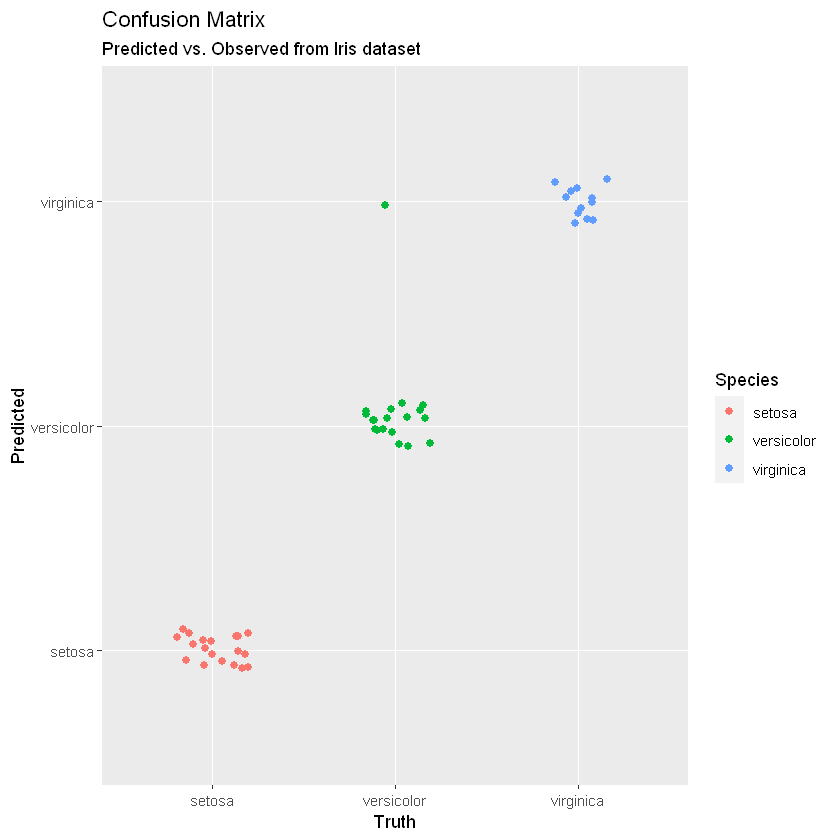

In [87]:
ggplot(test, aes(Species, pred, color = Species))  + geom_jitter(width = 0.2, height = 0.1, size = 2)  + labs(title = 'Confusion Matrix', subtitle = 'Predicted vs. Observed from Iris dataset', y = 'Predicted', x = 'Truth')

#### 요약
- 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때, 해당 데이터의 결과를 특정 분류로 예측하기 때문에 분류모델로 구분됨
- 로지스틱 회귀분석은 보통 종속변수가 이항일 때 많이 사용하나 범주가 3개 이상인 다항 로지스틱 회귀분석, 범주의 순서가 있는 서수 로지스틱 회귀분석도 존재함
- R에서 VGAM 패키지의 vglm() 함수를 이용하여 다항 로지스틱 회귀분석을 실시할 수 있음
- 분류의 성능은 정오분류표로 판단할 수 있음